C:\Users\Student.AQ-031114\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


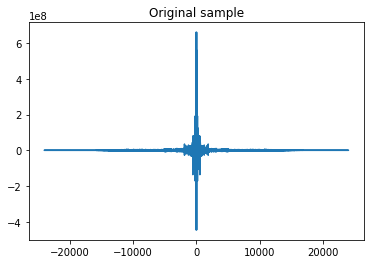

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import read, write
from numpy import fft

SampleF, data = read("test_audio.wav")

length = len (data)
zpad = np.zeros(3*length)

for i in range(length):
    zpad[3*i] = data[i,0]

mdata = data[:, 0]
F_data = fft.fft(mdata)
Lengthf = len (F_data)
datafreq = fft.fftfreq(Lengthf, 1/SampleF)

plt.plot(datafreq, F_data)
plt.title("Original sample")
plt.show()


C:\Users\Student.AQ-031114\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


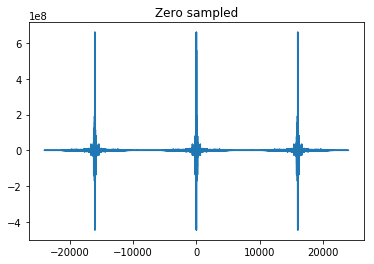

In [57]:
F_Sample = fft.fft(zpad)
LengthS = len (F_Sample)
datasample = fft.fftfreq(LengthS, 1/SampleF)
plt.plot(datasample,F_Sample)

plt.title("Zero sampled")
plt.show()

In [20]:
#In our up sampled FFt we have three copies of the original fft. THe zero padding allows us to not lose any of the data of the signal

C:\Users\Student.AQ-031114\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


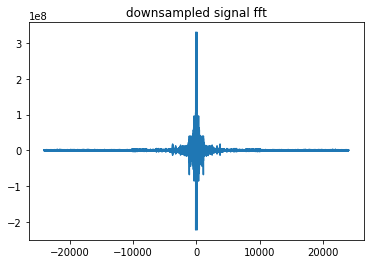

In [68]:
zpad = np.zeros(len(data) // 2)
for i in range(len(zpad)):
   zpad[i] = data[i*2,0]

downsample = fft.fft(zpad)
dfreq      = fft.fftfreq(len(downsample), 1/SampleF)
plt.plot (dfreq,downsample)
plt.title("downsampled signal fft")
plt.show()

C:\Users\Student.AQ-031114\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


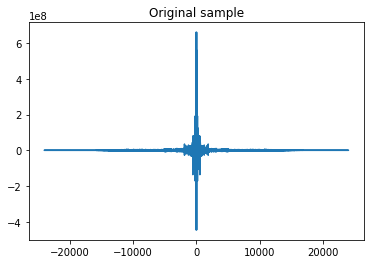

In [69]:
plt.plot(datafreq, F_data)
plt.title("Original sample")
plt.show()

In [ ]:
#The Amplitude of the downsampled signal is half of the orginal sample. In order to preserve the original information
# we need to sample at double the frequency of the final part of the signal that can be seen. THis is about 12k so 
# we should sample at about 24000. A problem that our downsample has is large side lobe action. 

In [70]:
from scipy import signal
from scipy.io.wavfile import read
from IPython.display import Audio

Fs, data = read('test_audio.wav')
data = data[:, 0]

up_ratio = 2
down_ratio = 1

output = signal.resample_poly(data, up_ratio, down_ratio)

Audio(output, rate=Fs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [71]:
up_ratio = 1
down_ratio = 1

output = signal.resample_poly(data, up_ratio, down_ratio)

Audio(output, rate=Fs)

In [72]:
up_ratio = 1
down_ratio = 2

output = signal.resample_poly(data, up_ratio, down_ratio)

Audio(output, rate=Fs)